In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

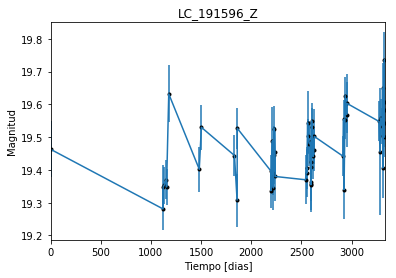

In [2]:
 data = np.genfromtxt('LC_191596_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191596_Z')
plt.savefig("LC_191596_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

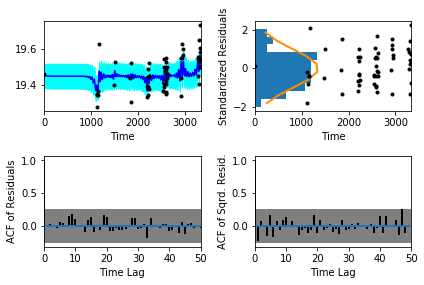

In [5]:
sample.assess_fit()

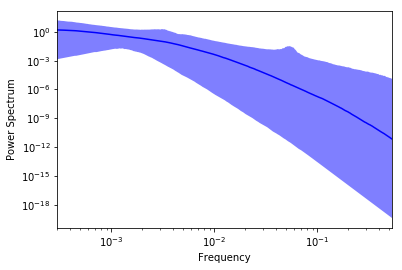

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

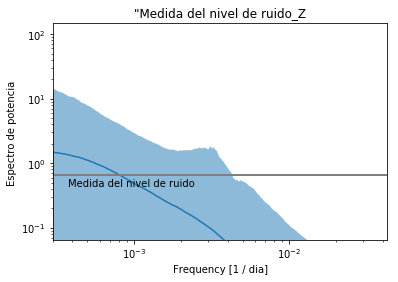

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191596_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191596_Z')

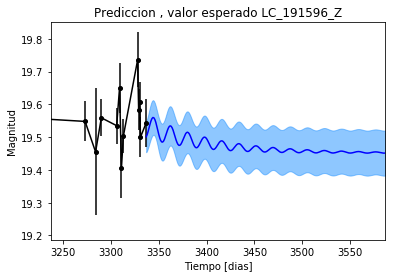

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191596_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191596_Z')

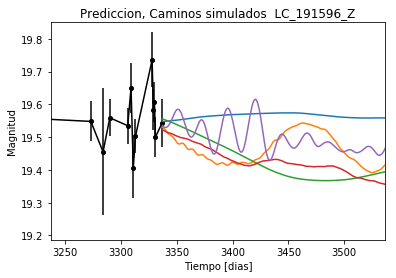

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191596_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


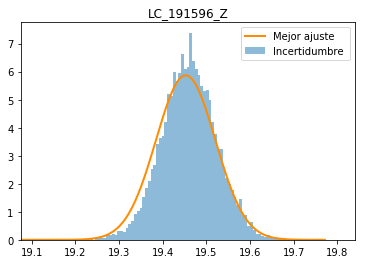

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191596_Z')
plt.savefig("Mejor_ajuste_LC_191596_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191596_Z')

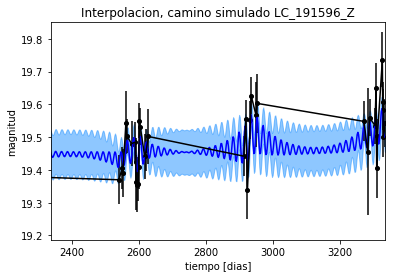

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_191596_Z')

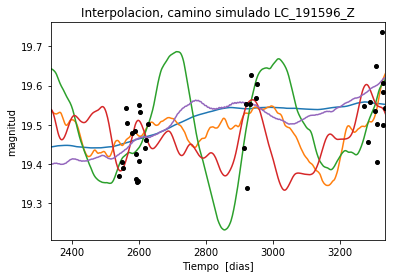

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 684.897969774
Median: 0.00542932287235
Standard deviation: 0.176509756105
68% credibility interval: [ 0.00068058  0.12332732]
95% credibility interval: [  3.41852709e-04   7.02615476e-01]
99% credibility interval: [  3.07254842e-04   1.01251331e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 474.954149837
Median: 0.00194788766475
Standard deviation: 0.0820155703165
68% credibility interval: [ 0.00047468  0.02589938]
95% credibility interval: [ 0.00032233  0.2362532 ]
99% credibility interval: [  3.04253195e-04   6.33745807e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 332.168812675
Median: 0.0338339342732
Standard

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1368.41580541
Median: 87.0233088102
Standard deviation: 1.55714805756
68% credibility interval: [ 85.32296855  88.09981884]
95% credibility interval: [ 82.88478384  88.89473525]
99% credibility interval: [ 80.94701574  89.44943944]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 644.208885733
Median: 0.794100994584
Standard deviation: 2.2679070395
68% credibility interval: [ 0.05573986  4.15598872]
95% credibility interval: [ 0.01383324  7.77370674]
99% credibility interval: [  9.96567456e-03   1.03782605e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 757.345426415
Median: 0.419052106761
Standard deviation: 9.62120053362
68% credibility interval: [ 0.01146913  8.41217821]
95% credibility interval: [  4.86

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1149.0489135
Median: 6.54706953707e-15
Standard deviation: 3.15843675663e+76
68% credibility interval: [  1.99015963e-36   1.91134026e+08]
95% credibility interval: [  7.16858417e-65   3.02241931e+64]
99% credibility interval: [  7.23343972e-73   4.81757839e+75]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2353.08577889
Median: 19.4611511006
Standard deviation: 0.0395952463929
68% credibility interval: [ 19.42803341  19.49400469]
95% credibility interval: [ 19.38216088  19.53763066]
99% credibility interval: [ 19.33641169  19.58058068]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 339.568460951
Median: 0.0100493653853
Standard deviation: 0.254383585572
68% credibility interval: [ 0.          0.35775566]
95% credibility interval: [ 0.         0.9255576]
99% credibility interval: [ 0.          1.04095096]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 339.568460951
Median: 0.0100493653853
Standard deviation: 0.254383585572
68% credibility interval: [ 0.          0.35775566]
95% credibility interval: [ 0.         0.9255576]
99% credibility interval: [ 0.          1.04095096]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3308.01047007
Median: 0.0
Standard deviation: 0.00405979479067
68% credibi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1368.41580541
Median: 87.0233088102
Standard deviation: 1.55714805756
68% credibility interval: [ 85.32296855  88.09981884]
95% credibility interval: [ 82.88478384  88.89473525]
99% credibility interval: [ 80.94701574  89.44943944]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2601.64342879
Median: 0.005443880102
Standard deviation: 0.00737228713373
68% credibility interval: [ 0.00300141  0.01059977]
95% credibility interval: [ 0.00165363  0.02570574]
99% credibility interval: [ 0.00110253  0.04637849]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1954.89300711
Median: 1.09149226702
Standard deviation: 0.171998756507
68% credibility interval: [ 0.93740367  1.27335779]
95% credibility interval: [ 0.80465961  1.48194336]
99% credibility interval: [ 0.71995892  1.64065926]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 916.92028155
Median: 5.48649023029e-05
Standard deviation: 0.220087617112
68% credibility interval: [  1.39743808e-13   5.84464471e-03]
95% credibility interval: [  8.56525361e-68   2.71884151e-01]
99% credibility interval: [  2.09938496e-79   1.05505602e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 684.897969774
Median: (-0.0341134416995-0.339257016396j)
Standard deviation: 1.94542173318
68% credibility interval: [-0.77488838+0.j         -0.00427622-2.40190647j]
95% credibility interval: [ -4.41466323e+00+0.j          -2.14792392e-03-0.40617454j]
99% credibility interval: [ -6.36180877e+00+0.j         -1.93053911e-03-0.0015647j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 474.954149837
Median: (-0.0122389391552+1.73368839417j)
Standard deviation: 1.67935759158
68% credibility interval: [-0.16273061+2.42887486j -0.00298252+0.j        ]
95% credibility interval: [-1.48442267+2.58948306j -0.00202523+0.j        ]
99% credibility interval: [ -3.98194235e+00+6.12740756j  -1.91167921e-03+0.01980081j]
Posterior summa